In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
print(df['area_type'].unique())
print(df['availability'].unique())
print(df['location'].unique())
print(df['size'].unique())
print(df['society'].unique())
print(df['total_sqft'].unique())
print(df['bath'].unique())
print(df['balcony'].unique())
print(df['price'].unique())



['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
['2 BHK' '4 Be

In [6]:
area_type_stats =df['area_type'].value_counts(ascending=False)
area_type_stats

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#Check missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
final_dataset=df[['location', 'size','total_sqft', 'bath', 'price']]
#Check missing values
final_dataset.isnull().sum()
# final_dataset.shape

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
final_dataset.dropna(inplace = True)
final_dataset['size'] = final_dataset['size'].apply(lambda x: int(x.split(' ')[0]))
# final_dataset.drop(['size'],axis=1,inplace=True)
# final_dataset=final_dataset[final_dataset['area_type']!='Carpet Area']
# final_dataset.drop(['area_type'],axis=1,inplace=True)
#Check missing values
final_dataset.isnull().sum()


<ipython-input-10-cf18c22298cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.dropna(inplace = True)
<ipython-input-10-cf18c22298cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['size'] = final_dataset['size'].apply(lambda x: int(x.split(' ')[0]))


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
final_dataset.head()
final_dataset['total_sqft'].unique()
# final_dataset.dtypes
# final_dataset.astype({'total_sqft': 'int64'}).dtypes

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def sqfttnum(x):
    tokens=x.split('-')
    if len(tokens)==2:
            return  (float(tokens[0])+float(tokens[0]))/2
    try:
            return float(x)
    except:
            return None

In [13]:
final_dataset.total_sqft=final_dataset.total_sqft.apply(sqfttnum)
final_dataset=final_dataset[final_dataset.total_sqft.notnull()]
final_dataset.head()

C:\Users\Mayank\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [14]:
# final_dataset.isnull().sum()
final_dataset.dtypes

location       object
size            int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [15]:
final_dataset.describe()

,size,total_sqft,bath,price
count,13200.000000,13200.000000,13200.000000,13200.000000
mean,2.800833,1553.828434,2.691136,112.276178
std,1.292843,1236.490450,1.338915,149.175995
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1272.000000,2.000000,71.850000
75%,3.000000,1670.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


In [16]:
final_dataset = final_dataset[final_dataset['total_sqft']>=100.0]

In [17]:
final_dataset.describe()

,size,total_sqft,bath,price
count,13193.000000,13193.000000,13193.000000,13193.000000
mean,2.800424,1554.640668,2.690897,112.280417
std,1.292252,1236.315311,1.338470,149.208234
min,1.000000,250.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1272.000000,2.000000,71.800000
75%,3.000000,1672.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


In [19]:
final_dataset['pricepersqft'] = 100000*final_dataset['price']/final_dataset['total_sqft']

In [20]:
final_dataset.describe()

,size,total_sqft,bath,price,pricepersqft
count,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,2.800424,1554.640668,2.690897,112.280417,6702.031802
std,1.292252,1236.315311,1.338470,149.208234,4561.136695
min,1.000000,250.000000,1.000000,8.000000,267.829813
25%,2.000000,1100.000000,2.000000,50.000000,4271.356784
50%,3.000000,1272.000000,2.000000,71.800000,5445.544554
75%,3.000000,1672.000000,3.000000,120.000000,7317.073171
max,43.000000,52272.000000,40.000000,3600.000000,176470.588235


In [22]:
q_low = final_dataset['pricepersqft'].quantile(0.01)
q_hi  = final_dataset['pricepersqft'].quantile(0.99)

df_fil = final_dataset[(final_dataset['pricepersqft'] < q_hi) & (final_dataset['pricepersqft'] > q_low)]
# final_dataset=final_dataset[((final_dataset['pricepersqft']-final_dataset['pricepersqft'].mean())/final_dataset['pricepersqft'].std()) > 3]

In [24]:
df_fil.describe()

,size,total_sqft,bath,price,pricepersqft
count,12925.000000,12925.000000,12925.000000,12925.000000,12925.000000
mean,2.780967,1527.834333,2.671954,106.536621,6494.936476
std,1.208941,940.251911,1.263647,119.136469,3480.824078
min,1.000000,250.000000,1.000000,8.000000,2550.191571
25%,2.000000,1100.000000,2.000000,50.000000,4285.714286
50%,3.000000,1273.000000,2.000000,71.195000,5446.009390
75%,3.000000,1662.000000,3.000000,119.000000,7259.528131
max,27.000000,30400.000000,27.000000,2340.000000,23214.285714


In [25]:
df_fil.head()

,location,size,total_sqft,bath,price,pricepersqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [27]:
df_fil.location = df_fil.location.apply(lambda x: x.strip())
location_stats = df_fil['location'].value_counts(ascending=False)
location_stats

C:\Users\Mayank\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Whitefield         530
Sarjapur  Road     391
Electronic City    286
Kanakpura Road     264
Thanisandra        235
                  ... 
RMC YARD             1
Air View Colony      1
Garden Layout        1
Subramanyanagar      1
Mullur               1
Name: location, Length: 1262, dtype: int64

In [30]:
len(location_stats[location_stats>15])

176

In [32]:
df4=df_fil

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=15]
# location_stats_less_than_10
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

C:\Users\Mayank\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


177

In [38]:
df4=pd.get_dummies(df4,drop_first=True)
df4.head()

,size,total_sqft,bath,price,pricepersqft,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,2,1056.0,2.0,39.07,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,120.00,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,62.00,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,95.00,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,51.00,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns
sns.pairplot(df4)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

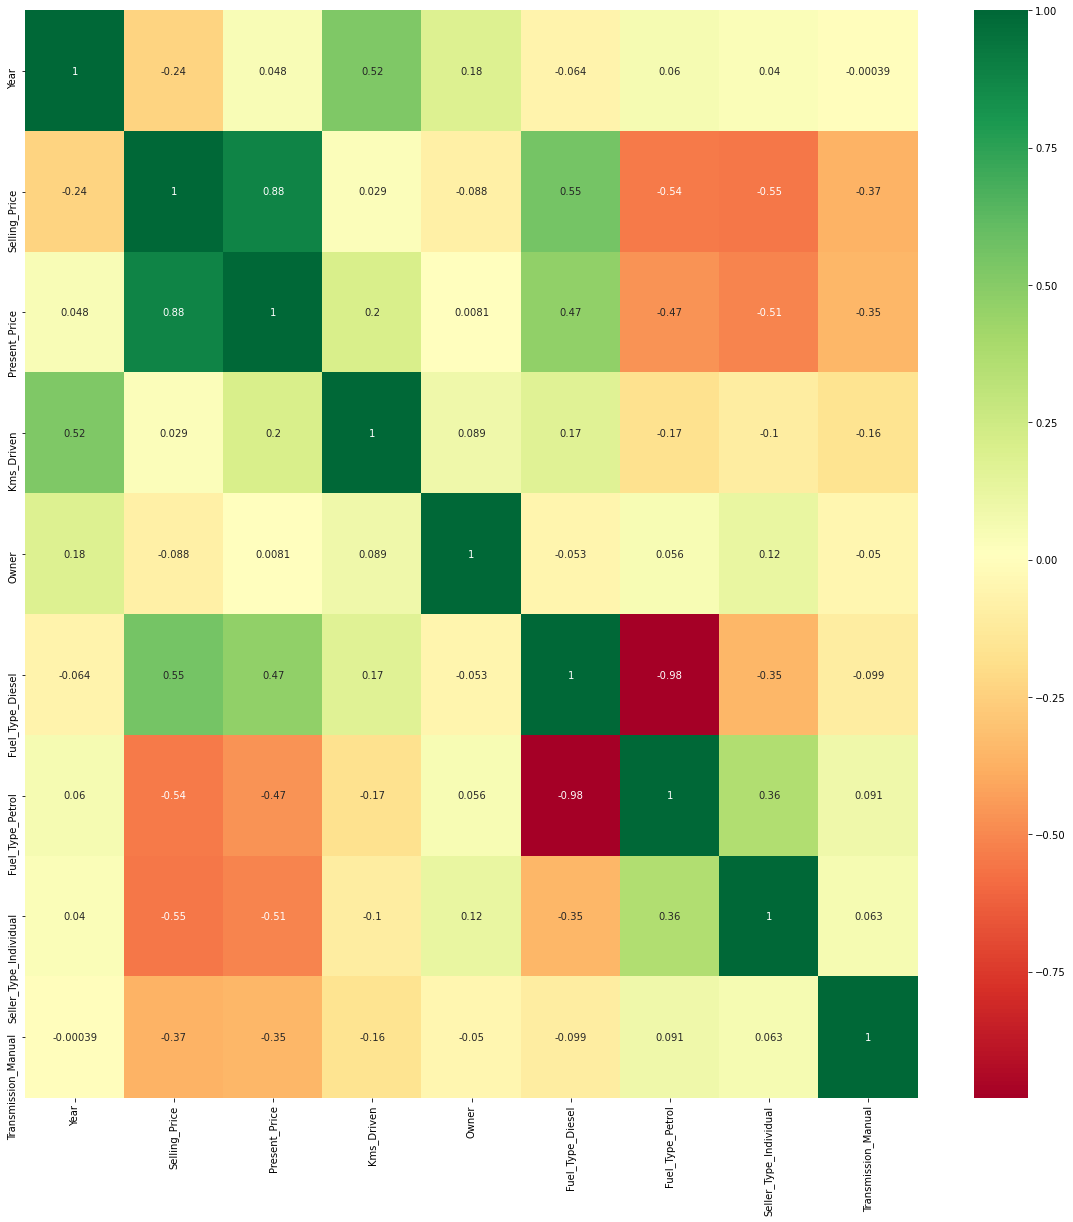

In [25]:
#Plot it in the form of Heatmap
cormat=df4.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [42]:
final_dataset['NoYear']=final_dataset['Year']
final_dataset.drop(['Year'],axis=1,inplace=True)

In [43]:
#Independent Features
X=final_dataset.iloc[:,1:]
#Dependent Features
y=final_dataset.iloc[:,0]

In [45]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [46]:
 # Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(model.feature_importances_)

[0.36519935 0.03911715 0.0013442  0.23170888 0.01290297 0.13540906
 0.13717162 0.07714677]


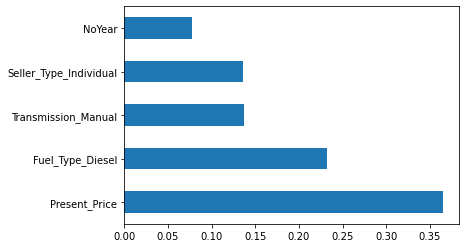

In [48]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
X_train.shape

(210, 8)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
regressor=RandomForestRegressor()

In [56]:
#Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [61]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [62]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
predictions=rf_random.predict(X_test)

In [64]:
predictions

array([ 7.10545,  0.54806,  5.06081,  9.28658, 16.50107,  5.01844,
        3.4287 ,  0.75813,  4.6831 ,  4.55745,  3.1222 ,  0.86658,
        4.98915,  7.87384,  7.87094, 10.27679,  7.33668,  4.1004 ,
        0.5091 ,  1.4836 ,  3.99221,  4.66654,  5.61645,  9.50571,
        0.24205,  0.76739,  0.50065,  0.63682,  0.48373,  4.85524,
        5.20061,  5.81445,  0.49417,  8.74671,  3.50407,  1.19863,
        5.61931,  7.51282,  0.26336,  8.97619,  9.27195, 19.43411,
        4.90143,  4.1273 ,  5.4046 , 11.6852 ,  0.32904,  0.88865,
        4.98135,  8.37096,  7.51914,  3.55441,  4.7231 , 20.71509,
        1.09274,  1.04786,  0.50111,  2.76275,  3.7161 ,  1.28937,
        3.9326 ,  8.82161,  3.22388, 21.11821,  4.19371,  5.53462,
       10.18905,  4.77958,  0.55674,  2.98784,  3.4307 ,  3.0333 ,
        0.67175,  5.4397 ,  0.80171,  2.83372,  0.50755,  9.15098,
        1.17327,  2.7857 ,  0.49513, 10.03757,  7.42877,  5.50545,
        5.15677,  0.95925,  6.21366,  5.92225,  0.45708,  4.99

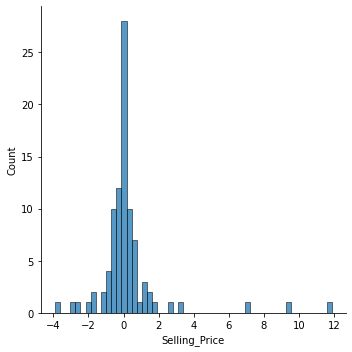

In [68]:
sns.displot(y_test-predictions)

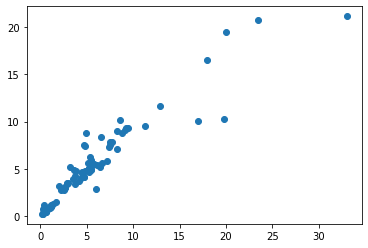

In [69]:
plt.scatter(y_test,predictions)

In [70]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
from sklearn import metrics

In [ ]:
rf_random.fit(X_train,y_train)